# xXx_L0n3W0LF_BLT_xXx

In [1]:
import numpy as np
from scipy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5.5)
%matplotlib notebook

## 2 Species Lotka-Volterra Model


\begin{align*}
\frac{dx}{dt} &= ax - bxy \\
\frac{dy}{dt} &= -dy + cxy \\
\end{align*}

Where:<br>
$ \frac{dx}{dt} $ is the rate of change in predator population<br>
$ \frac{dy}{dt} $ is the rate of change in prey population<br>

## Proposed 3 Species Lotka Volterra Model

\begin{align*}
\frac{dx}{dt} &= ax - bxy \\
\frac{dy}{dt} &= -cy + dxy - eyz \\
\frac{dz}{dt} &= -fz + gyz \\
\end{align*}

Where:<br>
$ \frac{dx}{dt} $ is the rate of change in low level prey population<br>
$ \frac{dy}{dt} $ is the rate of change in mid level predator/prey population<br>
$ \frac{dz}{dt} $ is the rate of change in top level predator population<br>

Low level prey is preyed upon by mid level species, mid level speicies is preyed upon by top level species.
- Toads are based on $ \frac{dx}{dt} $ 
- Birds are based on $ \frac{dy}{dt} $ 
- Lizards are based on $ \frac{dz}{dt} $

<IPython.core.display.Javascript object>


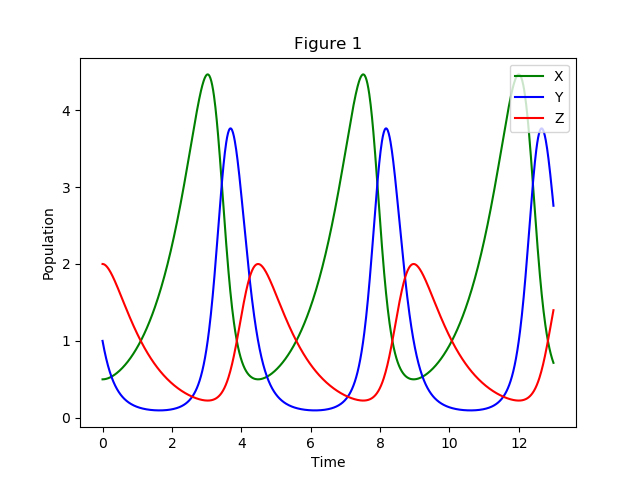

In [2]:
def dPdt2(x, t, a=1, b=1, c=1, d=1, e=1, f=1, g=1):
    '''3 Species Lotka-Volterra Predator Predator/Prey Prey System proposed by scientists that are smarter than us.
    
    '''
    X, Y, Z = x
    return([a*X - b*X*Y, -c*Y + d*X*Y - e*Y*Z, -f*Z + g*Y*Z])

time = r_[0:13:1000j]

P1 = odeint(dPdt2,[.5,1,2],time)
        
plt.figure()
plt.plot(time,P1[:,0],'g')
plt.plot(time,P1[:,1],'b')
plt.plot(time,P1[:,2],'r')
plt.legend(('X','Y','Z'), loc = 1)
plt.title('Figure 1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

__This graph illustrates a 13 year period with an initial population vector [0.5,1,2]. This graph matches the population model taken from "A Lotka-Volterra 3-species Food Chain" by Penn State researchers.__

## Our 3 Species Lotka-Volterra Model

\begin{align*}
\frac{dT}{dt} &= a_0T-a_1LT-a_2BT \\
\frac{dB}{dt} &= -b_0B - b_1BL + b_2BT \\
\frac{dL}{dt} &= -c_0L -c_1LT + c_2LB \\
\end{align*}

Where:<br>
$ \frac{dT}{dt} $ is the rate of change in Cane Toad Population<br>
$ \frac{dB}{dt} $ is the rate of change in Bird (Crimson Finch) Population<br>
$ \frac{dL}{dt} $ is the rate of change in Monitor Lizard Population<br>

Toads are preyed upon by birds and lizards. Birds are preyed upon by lizards.

Coeffiecients:<br>
a0 - birthrate of cane toads<br>
a1 - rate toads die to lizards<br>
a2 - rate toads die to birds<br>
b0 - death rate of birds<br>
b1 - rate birds die to lizards<br>
b2 - rate birds eat toads<br>
c0 - death rate of lizards<br>
c1 - rate lizards die to toads<br>
c2 - rate lizards eat birds<br>


### Assumptions:

- Well mixed population
- Birds/eggs are the same thing (lizards only eat eggs)
- Toads only die if eaten by lizards or birds
- Birds only die if eaten by lizards
- Lizards only sustain off of birds
- If a lizard encounters a toad or a bird, it will eat it
- Lizards always die if they eat a toad
- Birds do not die if they eat a toad

### Our Model

In [3]:
def dPdt(x, t, a0=1, a1=1, a2=1, b0=1, b1=1, b2=1, c0=1, c1=1, c2=1):
    '''Our 3 Species Lotka-Volterra Predator Predator/Prey Prey System.
    
    Parameters:
    x - array of initial populations [Toads, Birds, Lizards]
    t - time
    a0 - birthrate of cane toads
    a1 - rate toads die to lizards
    a2 - rate toads die to birds
    b0 - death rate of birds
    b1 - rate birds die to lizards
    b2 - rate birds eat toads
    c0 - death rate of lizards
    c1 - rate lizards die to toads
    c2 - rate lizards eat birds
    
    '''
    T, B, L = x
    return([a0*T - a1*L*T - a2*B*T, -b0*B - b1*B*L + b2*T*B, -c0*L - c1*T*L + c2*B*L])

In [4]:
time = r_[0:43:1000j]

In [5]:
P1 = odeint(dPdt,[1,1,1],time)

<IPython.core.display.Javascript object>


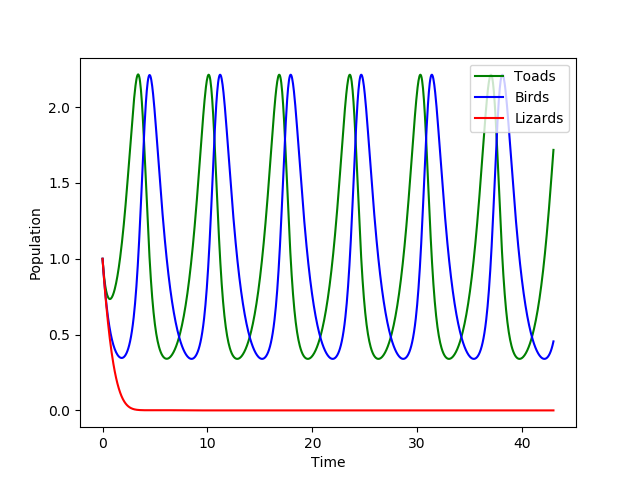

In [6]:
plt.figure()
plt.plot(time,P1[:,0],'g')
plt.plot(time,P1[:,1],'b')
plt.plot(time,P1[:,2],'r')
plt.legend(('Toads','Birds','Lizards'), loc = 1)
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

__In this model, with all coefficients set to 1, the lizard population goes to zero, and the birds and toads continue to live in a predator prey system.__

### Test Cell:

<IPython.core.display.Javascript object>


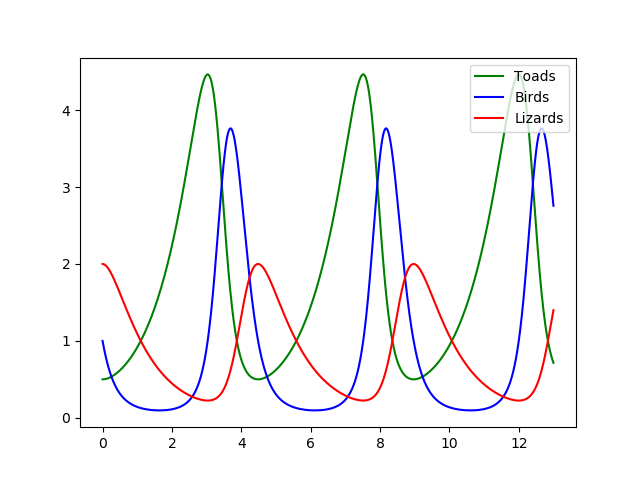

In [7]:
def dPdt2(x, t, a0=1, a1=0, a2=1, b0=1, b1=1, b2=1, c0=1, c1=0, c2=1):
    '''Our 3 Species Lotka-Volterra Predator Predator/Prey Prey System.
    
    Parameters:
    x - array of initial populations [Toads, Birds, Lizards]
    t - time
    a0 - birthrate of cane toads
    a1 - rate toads die to lizards
    a2 - rate toads die to birds
    b0 - death rate of birds
    b1 - rate birds die to lizards
    b2 - rate birds eat toads
    c0 - death rate of lizards
    c1 - rate lizards die to toads
    c2 - rate lizards eat birds
    
    '''
    T, B, L = x
    return([a0*T - a1*L*T - a2*B*T, -b0*B - b1*B*L + b2*T*B, -c0*L - c1*T*L + c2*B*L])

time = r_[0:13:1000j]

P2 = odeint(dPdt2,[.5,1,2],time)
        

plt.figure()
plt.plot(time,P2[:,0],'g')
plt.plot(time,P2[:,1],'b')
plt.plot(time,P2[:,2],'r')
plt.legend(('Toads','Birds','Lizards'), loc = 1)
plt.show()

__When we change our coefficients for interactions between lizards and toads to zero, our model now matches Figure 1 above. This now represents a stable 3 species predator prey system. This can be achieved in the real world by training lizards to not eat cane toads, something that has been tested to work.__